In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [20]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
def create_convolutional_layer(filters, kernel_size, activation='relu', input_shape=None):
    if input_shape:
        return layers.Conv2D(filters, kernel_size, activation=activation, input_shape=input_shape)
    else:
        return layers.Conv2D(filters, kernel_size, activation=activation)

In [15]:
def create_maxpooling_layer(pool_size=(2, 2)):
    return layers.MaxPooling2D(pool_size)

In [16]:
def create_dense_layer(units, activation='relu'):
    return layers.Dense(units, activation=activation)

In [17]:
model = models.Sequential()
# Convolutional layers
model.add(create_convolutional_layer(32, (3, 3), input_shape=(28, 28, 1)))
model.add(create_maxpooling_layer())
model.add(create_convolutional_layer(64, (3, 3)))
model.add(create_maxpooling_layer())
# Flatten layer
model.add(layers.Flatten())
# Dense layers
model.add(create_dense_layer(64))
model.add(create_dense_layer(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.fit(train_images, train_labels, epochs=5,batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.7525 - loss: 0.6911 - val_accuracy: 0.8603 - val_loss: 0.3941
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8748 - loss: 0.3463 - val_accuracy: 0.8818 - val_loss: 0.3324
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.8927 - loss: 0.2940 - val_accuracy: 0.8926 - val_loss: 0.2947
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9102 - loss: 0.2480 - val_accuracy: 0.8955 - val_loss: 0.2879
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.9142 - loss: 0.2321 - val_accuracy: 0.9069 - val_loss: 0.2588


In [8]:
n=150 # change this number to see different predictions
predictions2 = [test_images[n:n+5],model.predict(test_images[n:n+5])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


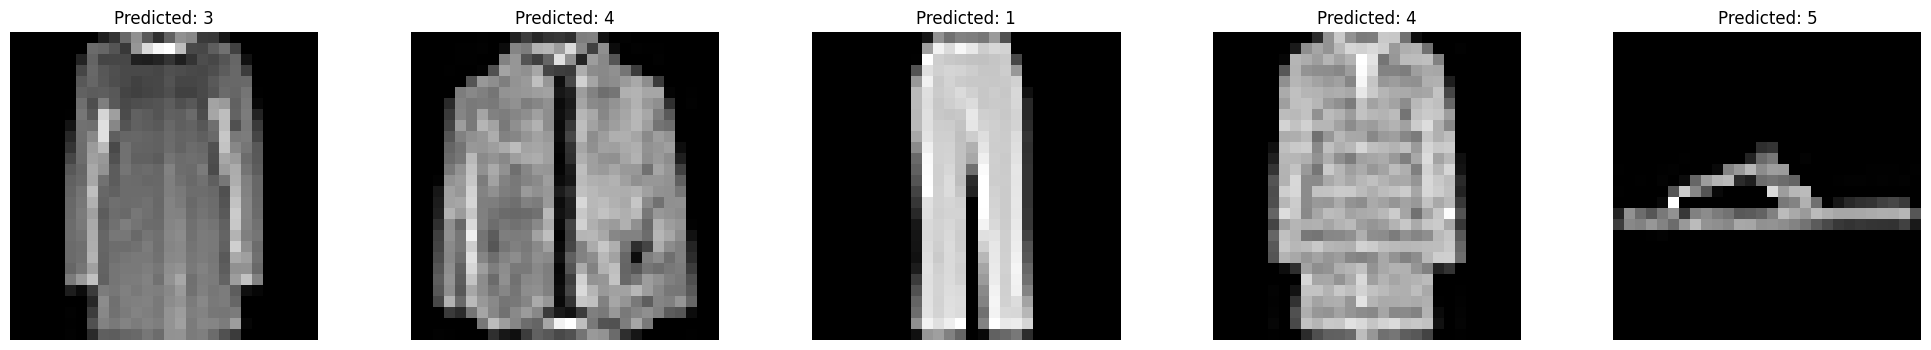

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(25, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img_data = predictions2[0][i].reshape(28, 28)
    plt.imshow(img_data, cmap='gray')
    plt.title(f'Predicted: {tf.argmax(predictions2[1][i])}')
    plt.axis('off')
plt.show()